# X19199988-DAPA PROJECT.

DATASET USED- Loan Defaulter Data

DATASET SOURCE- https://www.kaggle.com/gauravduttakiit/loan-defaulter

MODELS USED - 1) LOGISTIC RERGRESSION

!pip install requests
!pip install pymongo
!pip install pypyodbc
!pip install folium
!pip install imblearn

In [1]:
import numpy as np
import requests
import json
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt 
import os
from pymongo import MongoClient
import psycopg2
import io
import pandas.io.sql as sqlio
from pandas import DataFrame
from sklearn.utils import resample
import seaborn as sns

from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import missingno as msno
import matplotlib.pyplot as plotter
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

from sklearn import preprocessing

In [2]:
os.chdir('C:/Users/vinee/Desktop/DAPA/CA2')

In [3]:
raw_dataframe= pd.read_csv("application_data_1.csv") 
raw_dataframe.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Cleaning

In [5]:
#checking the percentage of null values from all the columns.
df_percent_missing =pd.DataFrame(raw_dataframe.isnull().sum() * 100 / len(raw_dataframe))
df_percent_missing.columns=['Null_Percentage']
print(df_percent_missing)

                              Null_Percentage
SK_ID_CURR                           0.000000
TARGET                               0.000000
NAME_CONTRACT_TYPE                   0.000000
CODE_GENDER                          0.000000
FLAG_OWN_CAR                         0.000000
FLAG_OWN_REALTY                      0.000000
CNT_CHILDREN                         0.000000
AMT_INCOME_TOTAL                     0.000000
AMT_CREDIT                           0.000000
AMT_ANNUITY                          0.003902
AMT_GOODS_PRICE                      0.090403
NAME_TYPE_SUITE                      0.420148
NAME_INCOME_TYPE                     0.000000
NAME_EDUCATION_TYPE                  0.000000
NAME_FAMILY_STATUS                   0.000000
NAME_HOUSING_TYPE                    0.000000
REGION_POPULATION_RELATIVE           0.000000
DAYS_BIRTH                           0.000000
DAYS_EMPLOYED                        0.000000
DAYS_REGISTRATION                    0.000000
DAYS_ID_PUBLISH                   

In [6]:
#removing columns having not null values less than 50% of the total rows.
raw_dataframe.dropna(axis=1, how="any", thresh=len(raw_dataframe)*.50, inplace=True)

#removing rows for the columns having null values less than 50%
cols_to_delete = raw_dataframe.columns[raw_dataframe.isnull().sum()/len(raw_dataframe) < .50]
raw_dataframe.dropna(axis=0, how="any", thresh=None, subset=cols_to_delete.values, inplace=True)

#replacing the null values with their mode as all the columns are catagorical in nature.
columns_to_replace = raw_dataframe.columns[raw_dataframe.isnull().sum()/len(raw_dataframe) !=.00]

for i in columns_to_replace:
    raw_dataframe[i].fillna(raw_dataframe[i].mode()[0],inplace=True)
    
#checking the percentage of null values from all the columns.
df_percent_missing =pd.DataFrame(raw_dataframe.isnull().sum() * 100 / len(raw_dataframe))
df_percent_missing.columns=['Null_Percentage']
df_percent_missing

,Null_Percentage
SK_ID_CURR,0.0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
FLAG_OWN_REALTY,0.0
CNT_CHILDREN,0.0
AMT_INCOME_TOTAL,0.0
AMT_CREDIT,0.0
AMT_ANNUITY,0.0


In [7]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84575 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    84575 non-null  int64  
 1   TARGET                        84575 non-null  int64  
 2   NAME_CONTRACT_TYPE            84575 non-null  object 
 3   CODE_GENDER                   84575 non-null  object 
 4   FLAG_OWN_CAR                  84575 non-null  object 
 5   FLAG_OWN_REALTY               84575 non-null  object 
 6   CNT_CHILDREN                  84575 non-null  int64  
 7   AMT_INCOME_TOTAL              84575 non-null  float64
 8   AMT_CREDIT                    84575 non-null  float64
 9   AMT_ANNUITY                   84575 non-null  float64
 10  AMT_GOODS_PRICE               84575 non-null  float64
 11  NAME_TYPE_SUITE               84575 non-null  object 
 12  NAME_INCOME_TYPE              84575 non-null  object 
 13  

## DATA VISUALIZATION

Text(0.5, 1.0, 'Distribution of Target variable')

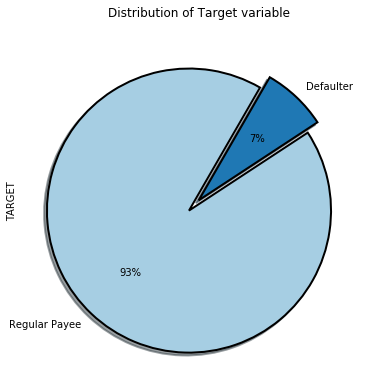

In [8]:
plt.figure(figsize=(14,7))
plt.subplot(121)
raw_dataframe["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Paired",7),
    startangle = 60,labels=["Regular Payee","Defaulter"],wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target variable")

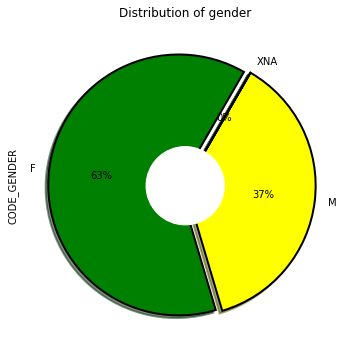

In [9]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
raw_dataframe["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["green","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
circ = plt.Circle((0,0),.3,color="white")
plt.gca().add_artist(circ)
plt.show()

Text(0.5, 1.0, "Regular payee's count for income types")

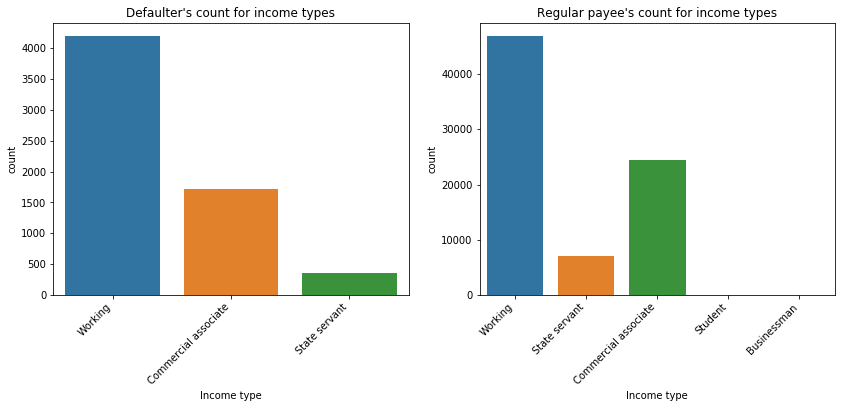

In [10]:
# Client with all other cases (Target=1)
target_1 = raw_dataframe[raw_dataframe['TARGET'] == 1]
target_1.head()

# Client with all other cases (Target=0)
target_0 = raw_dataframe[raw_dataframe['TARGET'] == 0]
target_0.head()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.title("Defaulter's count for income types")

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.title("Regular payee's count for income types")


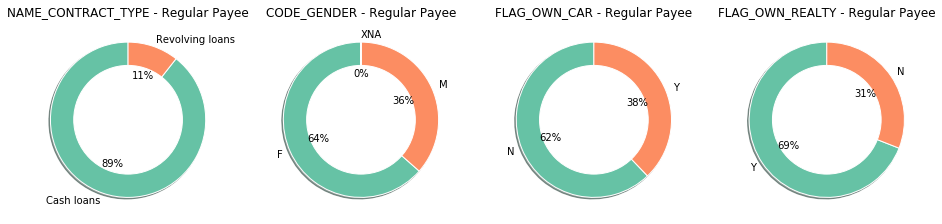

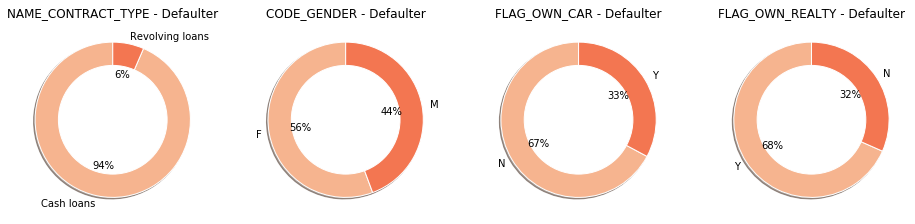

In [11]:

import itertools
default = raw_dataframe[raw_dataframe["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = raw_dataframe[raw_dataframe["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set2",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+" - Regular Payee")
    
fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("rocket_r"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+" - Defaulter")



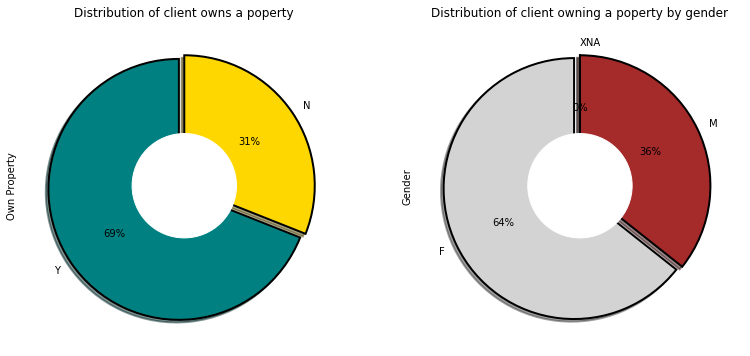

In [12]:
plt.figure(figsize=(13,6))
plt.subplot(121)
raw_dataframe["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["teal","gold"],startangle = 90,
                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a poperty")
circ = plt.Circle((0,0),.4,color="white")
plt.gca().add_artist(circ)
plt.ylabel("Own Property")

plt.subplot(122)
raw_dataframe[raw_dataframe["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",
    colors = ["lightgray","brown"],startangle = 90,wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a poperty by gender")
circ = plt.Circle((0,0),.4,color="white")
plt.gca().add_artist(circ)
plt.ylabel("Gender")
plt.show()

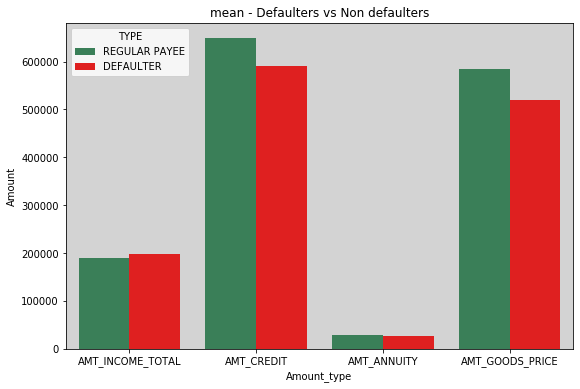

In [13]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
COLUMNS = raw_dataframe.groupby("TARGET")[cols].describe().transpose().reset_index()
COLUMNS = COLUMNS[COLUMNS["level_1"].isin([ 'mean'])] 
df_x = COLUMNS[["level_0","level_1",0]]
df_y = COLUMNS[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"Amount_type", 'level_1':"statistic", 0:"Amount"})
df_x["TYPE"] = "REGULAR PAYEE"
df_y = df_y.rename(columns={'level_0':"Amount_type", 'level_1':"statistic", 1:"Amount"})
df_y["TYPE"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(20,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["Amount_type"],df_new[df_new["statistic"] == i]["Amount"],
                hue=df_new[df_new["statistic"] == i]["TYPE"],palette=["seagreen","red"])
    plt.title(i + " - Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .5)
    fig.set_facecolor("lightgrey")

## Feature Engineering

In [14]:
#PCA application for document related features in the data.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
            'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
           'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
           'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
# Separating out the features
x = raw_dataframe.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents,columns = ['PCA_FLAG_DOCUMENT'])
raw_dataframe['PCA_FLAG_DOCUMENT']=principalComponents

raw_dataframe.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
            'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
           'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
           'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis = 1,inplace=True)

In [15]:
#PCA application for AMOUNT CREDIT REQUIRED features in the data.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
# Separating out the features
x = raw_dataframe.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents,columns = ['PCA_FLAG_DOCUMENT'])
raw_dataframe['PCA_FLAG_AMT_REQ_CREDIT']=principalComponents

raw_dataframe.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'], axis = 1,inplace=True)

In [16]:
#Removing NON-REQUIRED columns from the dataframe.
del raw_dataframe['SK_ID_CURR']
del raw_dataframe['FLAG_MOBIL']
del raw_dataframe['FLAG_CONT_MOBILE']
del raw_dataframe['LIVE_REGION_NOT_WORK_REGION']

In [17]:
#encoding categorical features
from sklearn.preprocessing import LabelEncoder
##Converting categorical data into numerical data by using Label Encoder.
stringcols = ('NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 
              'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START'
              ,'ORGANIZATION_TYPE','EMERGENCYSTATE_MODE')


for c in stringcols:
    lbl = LabelEncoder() 
    lbl.fit(list(raw_dataframe[c].values)) 
    raw_dataframe[c] = lbl.transform(list(raw_dataframe[c].values))

raw_dataframe.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,PCA_FLAG_DOCUMENT,PCA_FLAG_AMT_REQ_CREDIT
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,4,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,0,8,1.0,2,2,6,10,0,0,0,0,0,5,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,0,2.0,2.0,2.0,2.0,-1134.0,-0.683354,-0.136806
12,0,0,0,0,1,0,67500.0,80865.0,5881.5,67500.0,6,4,4,1,1,0.031329,-13439,-2717,-311.0,-3227,1,1,1,0,8,2.0,2,2,0,10,0,0,0,0,0,4,0.715042,0.176653,0.9811,0.1667,0.9811,0.1667,0.9811,0.1667,0.0612,0,0.0,0.0,0.0,0.0,-2370.0,-0.683354,-0.164440
13,0,0,1,1,0,1,225000.0,918468.0,28966.5,697500.0,6,4,4,1,1,0.016612,-14086,-3028,-643.0,-4911,1,0,0,0,4,3.0,2,2,4,13,0,0,0,0,0,42,0.566907,0.770087,0.9806,0.3333,0.9806,0.3333,0.9806,0.3333,0.1417,0,0.0,0.0,0.0,0.0,-4.0,-0.683354,-0.136806
18,0,1,0,0,1,0,112500.0,157500.0,7875.0,157500.0,3,4,4,4,1,0.046220,-17718,-7804,-8751.0,-1259,1,0,1,0,8,1.0,1,1,0,13,0,0,0,0,0,13,0.706428,0.556727,0.9881,0.0833,0.9881,0.0833,0.9881,0.0833,0.0238,0,8.0,0.0,8.0,0.0,-239.0,-0.683354,-0.133494
22,0,0,0,0,0,1,450000.0,497520.0,32521.5,450000.0,6,4,4,1,4,0.020713,-11146,-4306,-114.0,-2518,1,0,0,0,14,3.0,3,2,4,6,0,0,0,0,0,42,0.457143,0.358951,0.9786,0.1667,0.9786,0.1667,0.9786,0.1667,0.0696,0,0.0,0.0,0.0,0.0,-468.0,-0.683354,-0.150056


### Target Feature Distribution

Text(0.5, 1.0, 'Target feature distribution before resampling')

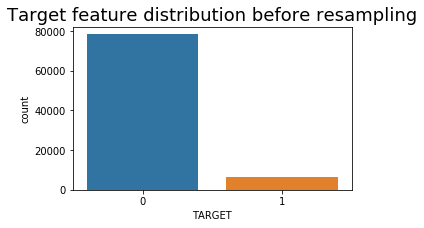

In [18]:
#size of the figure
plt.figure(figsize=(5,3))

#checking gender equality using bar plot
target = sns.countplot(x='TARGET',data = raw_dataframe)
plt.title("Target feature distribution before resampling", size=18)

# Model implimentation Without Balancing the data.

In [19]:
df_Unbalanced=raw_dataframe

# Dividing cleaned data into test and train dataset with 80:20 ratio.
X = df_Unbalanced.drop(['TARGET'], inplace=False, axis=1)
y = df_Unbalanced['TARGET']
# Standardizing the features
#X = StandardScaler().fit_transform(X)
#scaler = StandardScaler()
#scaler.fit(X)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#applying logistic regression model on the data.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train,y_train)
logistic_pred = LR.predict(X_test)

log_accuracy=(metrics.accuracy_score(y_test, logistic_pred))*100
Model_accuracies=[log_accuracy]

C:\Users\vinee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
#Model Performance
models = ['Logistic Regression']
mod_eval = pd.DataFrame({'Algorithms' : models , 'Accuracy' : Model_accuracies})
#print(mod_eval.sort_values(by='Accuracy' ,ascending=True))
print("BEFORE RESAMPLING")
print("*******************************************")

#model evalation for Logistic regrssion model.
print("Confusion matrix for Logistic regression model: \n",metrics.confusion_matrix(y_test, logistic_pred))
print("                                          ")
print("*******************************************")


print("Classification Report of Logistic regression model: \n", classification_report(y_test,logistic_pred))
print("*******************************************")

BEFORE RESAMPLING
*******************************************
Confusion matrix for Logistic regression model: 
 [[15620     4]
 [ 1288     3]]
                                          
*******************************************
Classification Report of Logistic regression model: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     15624
           1       0.43      0.00      0.00      1291

    accuracy                           0.92     16915
   macro avg       0.68      0.50      0.48     16915
weighted avg       0.89      0.92      0.89     16915

*******************************************


# Model implimentation With Balanced data

In [21]:
print(raw_dataframe['TARGET'].value_counts())
print("**********************************************")


0    78299
1     6276
Name: TARGET, dtype: int64
**********************************************


Text(0.5, 1.0, 'Target feature distribution after resampling')

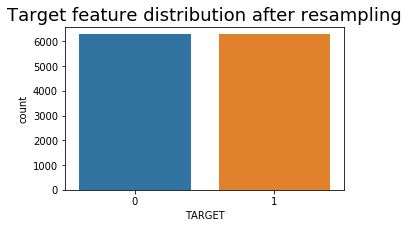

In [22]:
df_majority = raw_dataframe[raw_dataframe.TARGET==0]
df_minority = raw_dataframe[raw_dataframe.TARGET==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=6276,     # to match minority class
                                 random_state=50) # reproducible results
 
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

#size of the figure
plt.figure(figsize=(5,3))

#checking gender equality using bar plot
target = sns.countplot(x='TARGET',data = df_balanced)
plt.title("Target feature distribution after resampling", size=18)

In [23]:
# Dividing cleaned data into test and train dataset with 80:20 ratio.
X = df_balanced.drop(['TARGET'], inplace=False, axis=1)
y = df_balanced['TARGET']
# Standardizing the features
#X = StandardScaler().fit_transform(X)
#scaler = StandardScaler()
#scaler.fit(X)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
#applying logistic regression model on the data.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(X_train,y_train)
logistic_pred = LR.predict(X_test)

log_accuracy=(metrics.accuracy_score(y_test, logistic_pred))*100
Model_accuracies=[log_accuracy]

C:\Users\vinee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
#Model Performance
models = ['Logistic Regression']
mod_eval = pd.DataFrame({'Algorithms' : models , 'Accuracy' : Model_accuracies})
mod_eval.sort_values(by='Accuracy' ,ascending=True)
print("AFTER RESAMPLING")
print("*******************************************")

#model evalation for Logistic regrssion model.
print("Confusion matrix for Logistic regression model: \n",metrics.confusion_matrix(y_test, logistic_pred))
print("                                          ")
print("*******************************************")


print("Classification Report of Logistic regression model: \n", classification_report(y_test,logistic_pred))
print("*******************************************")

AFTER RESAMPLING
*******************************************
Confusion matrix for Logistic regression model: 
 [[863 374]
 [410 864]]
                                          
*******************************************
Classification Report of Logistic regression model: 
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      1237
           1       0.70      0.68      0.69      1274

    accuracy                           0.69      2511
   macro avg       0.69      0.69      0.69      2511
weighted avg       0.69      0.69      0.69      2511

*******************************************


### Prediction using Logistic regression.

In [26]:
# Avtual vs predicted values for logistic regression model.

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': logistic_pred.flatten()})
error.head(10)

,Actual Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,1,1
6,1,0
7,1,1
8,0,0
9,0,1
